In [1]:
import uproot
import pandas
import numpy
import matplotlib.pyplot as plt

#### Opening the 10M file

In [ ]:
input_file = uproot.open("10M.root")
input_tree = input_file["CaloExample"]["Calo"]
# Works only in uproot 3
#df = tree.pandas.df(flatten=False)

# Works only un uproot 4
np_array = input_tree.arrays(library="np")
np_title = np_array.keys()
df = pandas.DataFrame()

In [ ]:
input_tree.keys()

#### Opening the paraFile that contains zero and neg chi sq which indicate problem crystals

In [ ]:
file = uproot.open("paraFile.root")
feature = file["covar"]
np_array_paraFile = feature.arrays(library='pd')
np_title_paraFile = np_array_paraFile.keys()
#df_paraFile = pandas.DataFrame()
#print(np_title_paraFile)
#file = uproot.open("paraFile.root")
#feature = file["covar"]
#df = feature.arrays(library='pd')
### Using for loop on 10M file info to create a crystal map

#### Opening the arvivTable for chi2 that contains zero peak error which indicate problem crystals for chi2 model

In [2]:
file_chi2 = uproot.open("arXivTable_chi2.root")
feature = file_chi2["covar"]
np_array_chi2 = feature.arrays(library='pd')
np_title_chi2 = np_array_chi2.keys()

#### Opening the arvivTable for chi2 that contains zero peak error which indicate problem crystals for nll model

#### Opening the arvivTable for chi2 that contains zero peak error which indicate problem crystals for nll model

In [ ]:
file_nll = uproot.open("arXivTable_disk0_migrad.root")
feature = file_nll["covar"]
np_array_nll = feature.arrays(library='pd')
np_title_nll = np_array_nll.keys()

In [7]:
for title in np_title:
    dt = np_array[title].dtype.descr
    for idx in range(len(dt)):
        subtitle = dt[idx][0]
        if subtitle == "":
            df_title = title
            np_data = np_array[title]
            # convert 32 bytes data into 64 bytes for minuit migrad to work
            if type(np_data[0]) == numpy.float32:
                np_data = np_data.astype(numpy.float64)
            if type(np_data[0]) == numpy.int32:
                np_data = np_data.astype(numpy.int64)
            df[df_title] = np_data
        else:
            dd_title = title + " " + subtitle
            np_data = np_array[title][subtitle]
            # convert 32 bytes data into 64 bytes for minuit migrad to work
            if type(np_data[0]) == numpy.float32:
                np_data = np_data.astype(numpy.float64)
            if type(np_data[0]) == numpy.int32:
                np_data = np_data.astype(numpy.int64)


print(np_title)
for i in range(5):
    #print("nCluster: ", df["nCluster"][i], "\n")
    #print("cluList: ", df["cluList"][i], "\n")
    #print("length of cluList: ", len(df["cluList"][i]), "\n")
    print("cryId: ", df["cryId"][i])
    print("cryPosX: ", df["cryPosX"][i])
    print("cryPosY: ", df["cryPosY"][i])
    print("cryPosZ: ", df["cryPosZ"][i])
    print("crySimIdx: ", df["crySimIdx"][i])


max_cryId = 1347
# Initialize cryPos with an extra column for cryId (-1000 for placeholders)
cryPos = -1000 * numpy.ones((max_cryId, 4))

i = 0
# Loop until all placeholders in cryPos are updated
while numpy.any(cryPos[:, 1:] == [-1000, -1000, -1000]):
    for j in range(len(df["cryId"][i])):
        cry_id = df["cryId"][i][j]  # Get the cryId
        cryPos[cry_id - 1] = [
            cry_id,  # First column stores the cryId
            df["cryPosX"][i][j],
            df["cryPosY"][i][j],
            df["cryPosZ"][i][j],
        ]
    i += 1
numpy.savetxt("cryPos_wID.txt", cryPos, fmt = ['%d', '%.4e', '%.4e', '%.4e'], delimiter=',')#fmt='%.4e'fmt = ['%d', '%.4e', '%.4e', '%.4e']

dict_keys(['evt', 'run', 'cryEtot', 'nCrystals', 'trueEtot', 'nCry', 'cryId', 'crySectionId', 'cryPosX', 'cryPosY', 'cryPosZ', 'cryEdep', 'cryEdepErr', 'cryTime', 'cryTimeErr', 'cryT1', 'cryT2', 'cryT1Err', 'cryT2Err', 'cryConv', 'crySimIdx', 'crySimLen', 'nSim', 'simId', 'simPdgId', 'simCrCode', 'simMom', 'simStartX', 'simStartY', 'simStartZ', 'simStartT', 'simEndX', 'simEndY', 'simEndZ', 'simEndT', 'simTime', 'simEdep', 'simGenIdx', 'nVd', 'vdId', 'vdPdgId', 'vdGenId', 'vdMom', 'vdMomX', 'vdMomY', 'vdMomZ', 'vdPosX', 'vdPosY', 'vdPosZ', 'vdTime', 'vdGenIdx'])
cryId:  [723 785]
cryPosX:  [-4075.5  -4092.65]
cryPosY:  [-411.6 -445.9]
cryPosZ:  [10171. 10171.]
crySimIdx:  [0 1]
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []


In [8]:
for title in np_title:
    dt = np_array[title].dtype.descr
    for idx in range(len(dt)):
        subtitle = dt[idx][0]
        if subtitle == "":
            df_title = title
            np_data = np_array[title]
            # convert 32 bytes data into 64 bytes for minuit migrad to work
            if type(np_data[0]) == numpy.float32:
                np_data = np_data.astype(numpy.float64)
            if type(np_data[0]) == numpy.int32:
                np_data = np_data.astype(numpy.int64)
            df[df_title] = np_data
        else:
            dd_title = title + " " + subtitle
            np_data = np_array[title][subtitle]
            # convert 32 bytes data into 64 bytes for minuit migrad to work
            if type(np_data[0]) == numpy.float32:
                np_data = np_data.astype(numpy.float64)
            if type(np_data[0]) == numpy.int32:
                np_data = np_data.astype(numpy.int64)


print(np_title)
for i in range(5):
    #print("nCluster: ", df["nCluster"][i], "\n")
    #print("cluList: ", df["cluList"][i], "\n")
    #print("length of cluList: ", len(df["cluList"][i]), "\n")
    print("cryId: ", df["cryId"][i])
    print("cryPosX: ", df["cryPosX"][i])
    print("cryPosY: ", df["cryPosY"][i])
    print("cryPosZ: ", df["cryPosZ"][i])
    print("crySimIdx: ", df["crySimIdx"][i])


max_cryId = 1347
# Initialize cryPos with an extra column for cryId (-1000 for placeholders)
cryPos = -1000 * numpy.ones((max_cryId, 7))

i = 0
# Loop until all placeholders in cryPos are updated
while numpy.any(cryPos[:, 1:] == [-1000, -1000, -1000]):
    for j in range(len(df["cryId"][i])):
        cry_id = df["cryId"][i][j]  # Get the cryId
        cryPos[cry_id - 1] = [
            cry_id,  # First column stores the cryId
            df["cryPosX"][i][j],
            df["cryPosY"][i][j],
            df["cryPosZ"][i][j],
            df["simStartX"][i][j],
            df["simStartY"][i][j],
            df["simStartZ"][i][j],
        ]
    i += 1
numpy.savetxt("testfile.txt", cryPos, fmt = ['%d', '%.4e', '%.4e', '%.4e','%.4e', '%.4e', '%.4e'], delimiter=',')#fmt='%.4e'fmt = ['%d', '%.4e', '%.4e', '%.4e']

dict_keys(['evt', 'run', 'cryEtot', 'nCrystals', 'trueEtot', 'nCry', 'cryId', 'crySectionId', 'cryPosX', 'cryPosY', 'cryPosZ', 'cryEdep', 'cryEdepErr', 'cryTime', 'cryTimeErr', 'cryT1', 'cryT2', 'cryT1Err', 'cryT2Err', 'cryConv', 'crySimIdx', 'crySimLen', 'nSim', 'simId', 'simPdgId', 'simCrCode', 'simMom', 'simStartX', 'simStartY', 'simStartZ', 'simStartT', 'simEndX', 'simEndY', 'simEndZ', 'simEndT', 'simTime', 'simEdep', 'simGenIdx', 'nVd', 'vdId', 'vdPdgId', 'vdGenId', 'vdMom', 'vdMomX', 'vdMomY', 'vdMomZ', 'vdPosX', 'vdPosY', 'vdPosZ', 'vdTime', 'vdGenIdx'])
cryId:  [723 785]
cryPosX:  [-4075.5  -4092.65]
cryPosY:  [-411.6 -445.9]
cryPosZ:  [10171. 10171.]
crySimIdx:  [0 1]
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []
cryId:  []
cryPosX:  []
cryPosY:  []
cryPosZ:  []
crySimIdx:  []


/var/folders/xk/pjdx7f3d5mn0619jb79x5xxh0000gn/T/ipykernel_37583/2951196837.py:42: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while numpy.any(cryPos[:, 1:] == [-1000, -1000, -1000]):


In [9]:
import numpy as np

max_cryId = 1347
# Initialize pipePos with placeholders
pipePos = -1000 * np.ones((max_cryId, 4))

i = 0
# Loop until all placeholders in pipePos are updated
while np.any(pipePos[:, 1:] == [-1000, -1000, -1000]):
    if i >= len(df["cryId"]):  # Prevent index out of range
        print("No more data to process. Check your input files.")
        break

    for j in range(len(df["cryId"][i])):
        try:
            cry_id = df["cryId"][i][j]  # Get the cryId
            pipePos[cry_id - 1] = [
                cry_id,  # First column stores the cryId
                df["simStartX"][i][j],
                df["simStartY"][i][j],
                df["simStartZ"][i][j],
            ]
        except IndexError:
            print(f"Index error at i={i}, j={j}. Check input data consistency.")
            continue

    i += 1

# Save the array
np.savetxt("pipePosition.txt", pipePos, fmt=['%d', '%.4e', '%.4e', '%.4e'], delimiter=',')


Index error at i=12284, j=1. Check input data consistency.
Index error at i=25178, j=1. Check input data consistency.
Index error at i=37435, j=1. Check input data consistency.


#### Using a for loop to find locations of problem crystals

In [15]:
zero_chisq_with_crystal = []
zero_chisq = []
# Iterate over each value in df["ChiSq"] and the corresponding crystalNo in df["crystalNo"]
for chi_sq, crystal_no in zip(np_array_paraFile["ChiSq"], np_array_paraFile["crystalNo"]):
    # Check if the ChiSq value is equal to 0
    if chi_sq == 0:
        # Append a tuple of (crystal_no, chi_sq) to zero_chisq_with_crystal
        zero_chisq_with_crystal.append((crystal_no, chi_sq))
        
for crystal_no, _ in zero_chisq_with_crystal:
    zero_chisq.append(crystal_no)
print(zero_chisq)

[774.0, 776.0, 792.0, 795.0, 798.0, 814.0, 816.0, 818.0, 820.0, 822.0, 851.0, 865.0, 881.0, 941.0, 965.0, 969.0, 1006.0, 1029.0, 1039.0, 1071.0, 1097.0, 1144.0, 1183.0, 1209.0, 1243.0, 1275.0, 1281.0, 1316.0, 1336.0]


In [16]:
neg_chisq_with_crystal = []
neg_chisq = []
for chi_sq, crystal_no in zip(np_array_paraFile["ChiSq"], np_array_paraFile["crystalNo"]):
    if chi_sq < 0:
        neg_chisq_with_crystal.append((crystal_no, chi_sq))
        
for crystal_no, _ in neg_chisq_with_crystal:
    neg_chisq.append(crystal_no)
print(neg_chisq)

#### Using a for loop to find locations of zero peak errors in chi2 model

In [1]:
zero_error_with_crystal = []
zero_error = []
# Iterate over each value in df["ChiSq"] and the corresponding crystalNo in df["crystalNo"]
for peakerr, crystal_no in zip(np_array_chi2["PeakErr"], np_array_chi2["crystalNo"]):
    # Check if the ChiSq value is equal to 0
    if peakerr == 0:
        # Append a tuple of (crystal_no, chi_sq) to zero_chisq_with_crystal
        zero_error_with_crystal.append((crystal_no, peakerr))
        
for crystal_no, _ in zero_error_with_crystal:
    zero_error.append(crystal_no)

NameError: name 'np_array_chi2' is not defined

#### Using a for loop to find locations of zero peak errors in nll model

In [ ]:
zero_error_nll_with_crystal = []
zero_error_nll = []
# Iterate over each value in df["ChiSq"] and the corresponding crystalNo in df["crystalNo"]
for peakerr_nll, crystal_no in zip(np_array_nll["PeakErr"], np_array_nll["crystalNo"]):
    # Check if the ChiSq value is equal to 0
    if peakerr_nll == 0:
        # Append a tuple of (crystal_no, chi_sq) to zero_chisq_with_crystal
        zero_error_nll_with_crystal.append((crystal_no, peakerr_nll))
        
for crystal_no, _ in zero_error_nll_with_crystal:
    zero_error_nll.append(crystal_no)

[674.0, 682.0, 683.0, 685.0, 688.0, 690.0, 691.0, 692.0, 693.0, 695.0, 696.0, 699.0, 701.0, 702.0, 703.0, 706.0, 708.0, 709.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 719.0, 722.0, 723.0, 724.0, 725.0, 727.0, 728.0, 729.0, 730.0, 731.0, 733.0, 734.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0, 751.0, 755.0, 756.0, 759.0, 760.0, 761.0, 765.0, 769.0, 770.0, 771.0, 773.0, 774.0, 775.0, 776.0, 777.0, 778.0, 779.0, 780.0, 781.0, 782.0, 783.0, 784.0, 785.0, 786.0, 788.0, 789.0, 791.0, 792.0, 795.0, 797.0, 798.0, 799.0, 800.0, 802.0, 808.0, 809.0, 810.0, 811.0, 813.0, 814.0, 815.0, 816.0, 817.0, 819.0, 820.0, 821.0, 822.0, 823.0, 824.0, 825.0, 826.0, 827.0, 828.0, 829.0, 830.0, 831.0, 832.0, 833.0, 834.0, 835.0, 836.0, 837.0, 838.0, 839.0, 840.0, 841.0, 842.0, 844.0, 845.0, 846.0, 847.0, 848.0, 849.0, 850.0, 851.0, 852.0, 853.0, 855.0, 856.0, 857.0, 858.0, 859.0, 860.0, 861.0, 862.0, 863.0, 864.0, 865.0, 866.0, 867.0, 868.0

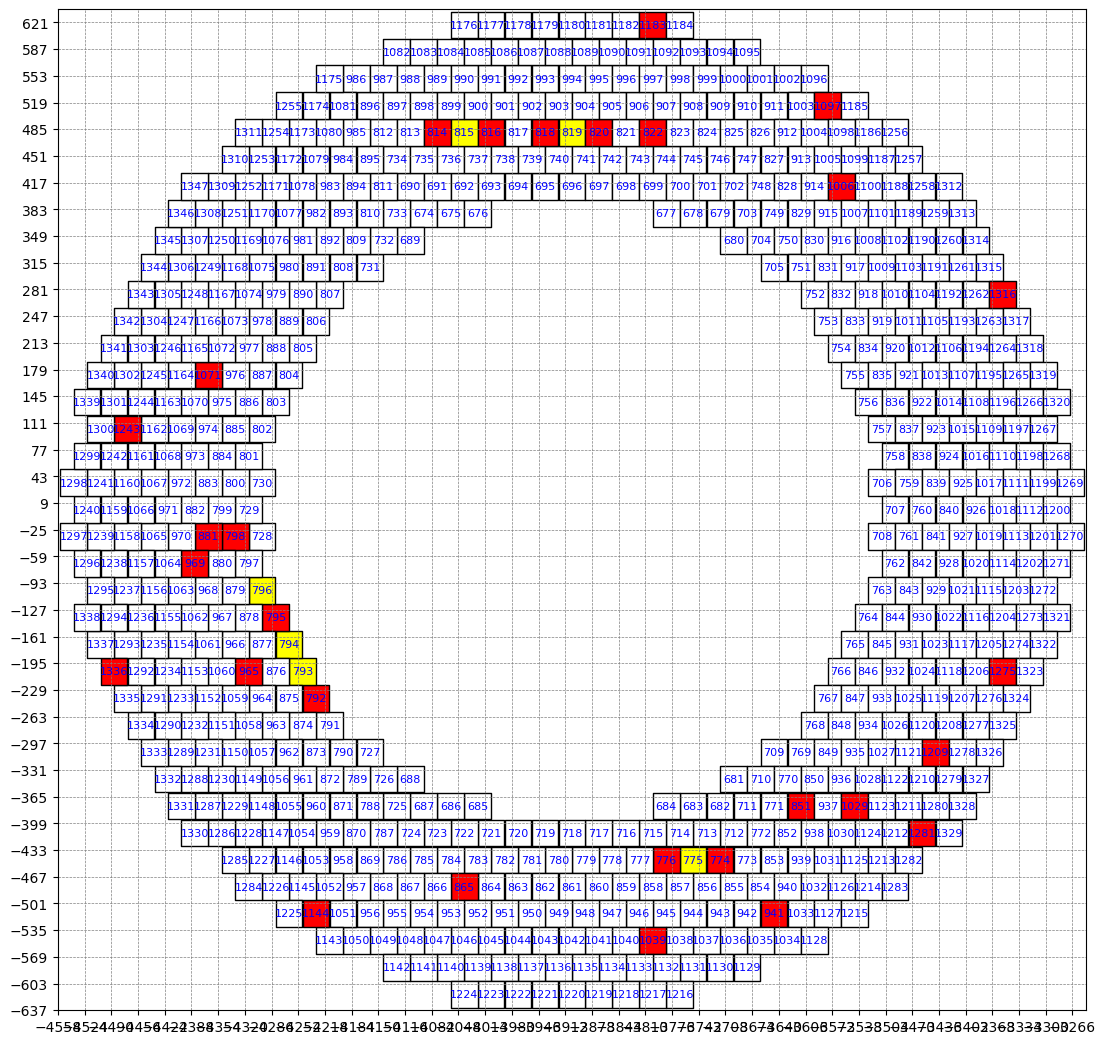

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Load cryPos data
cryPos = np.loadtxt("cryPos_wID.txt", delimiter=',')
cryPos = cryPos[673:]  # Use only rows from the 674th row onward

# Number of crystals
num_cry = len(cryPos)

# Create figure and axes
fig = plt.figure(figsize=(21, 13))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

# Draw rectangles with colors
for i in range(num_cry):
    x_val = cryPos[i, 1]  # x-coordinate
    y_val = cryPos[i, 2]  # y-coordinate
    cry_id = int(cryPos[i, 0])  # Cry ID from the first column

    # Check if cry_id is in zero_chisq
    if cry_id in zero_chisq:
        face_color = 'red'  # Color for zero_chisq crystals
    elif cry_id in neg_chisq:
            face_color = 'yellow'  # Color for zero_chisq crystals
    else:
        face_color = 'white'  # Default color

    # Draw the rectangle
    ax.fill_between(
        [x_val - 17, x_val + 17],
        y_val - 17, y_val + 17,
        color=face_color,
        edgecolor='black'
    )

    # Add text for cry_id
    ax.text(x_val, y_val, str(cry_id), va='center', ha='center', fontsize=8, color='blue')

# Set limits, grid, and ticks
min_x, max_x = np.min(cryPos[:, 1]) - 20, np.max(cryPos[:, 1]) + 20
min_y, max_y = np.min(cryPos[:, 2]) - 20, np.max(cryPos[:, 2]) + 20
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_xticks(np.arange(min_x, max_x, 34))
ax.set_yticks(np.arange(min_y, max_y, 34))
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.savefig("Problem_crys.png",dpi=150, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()


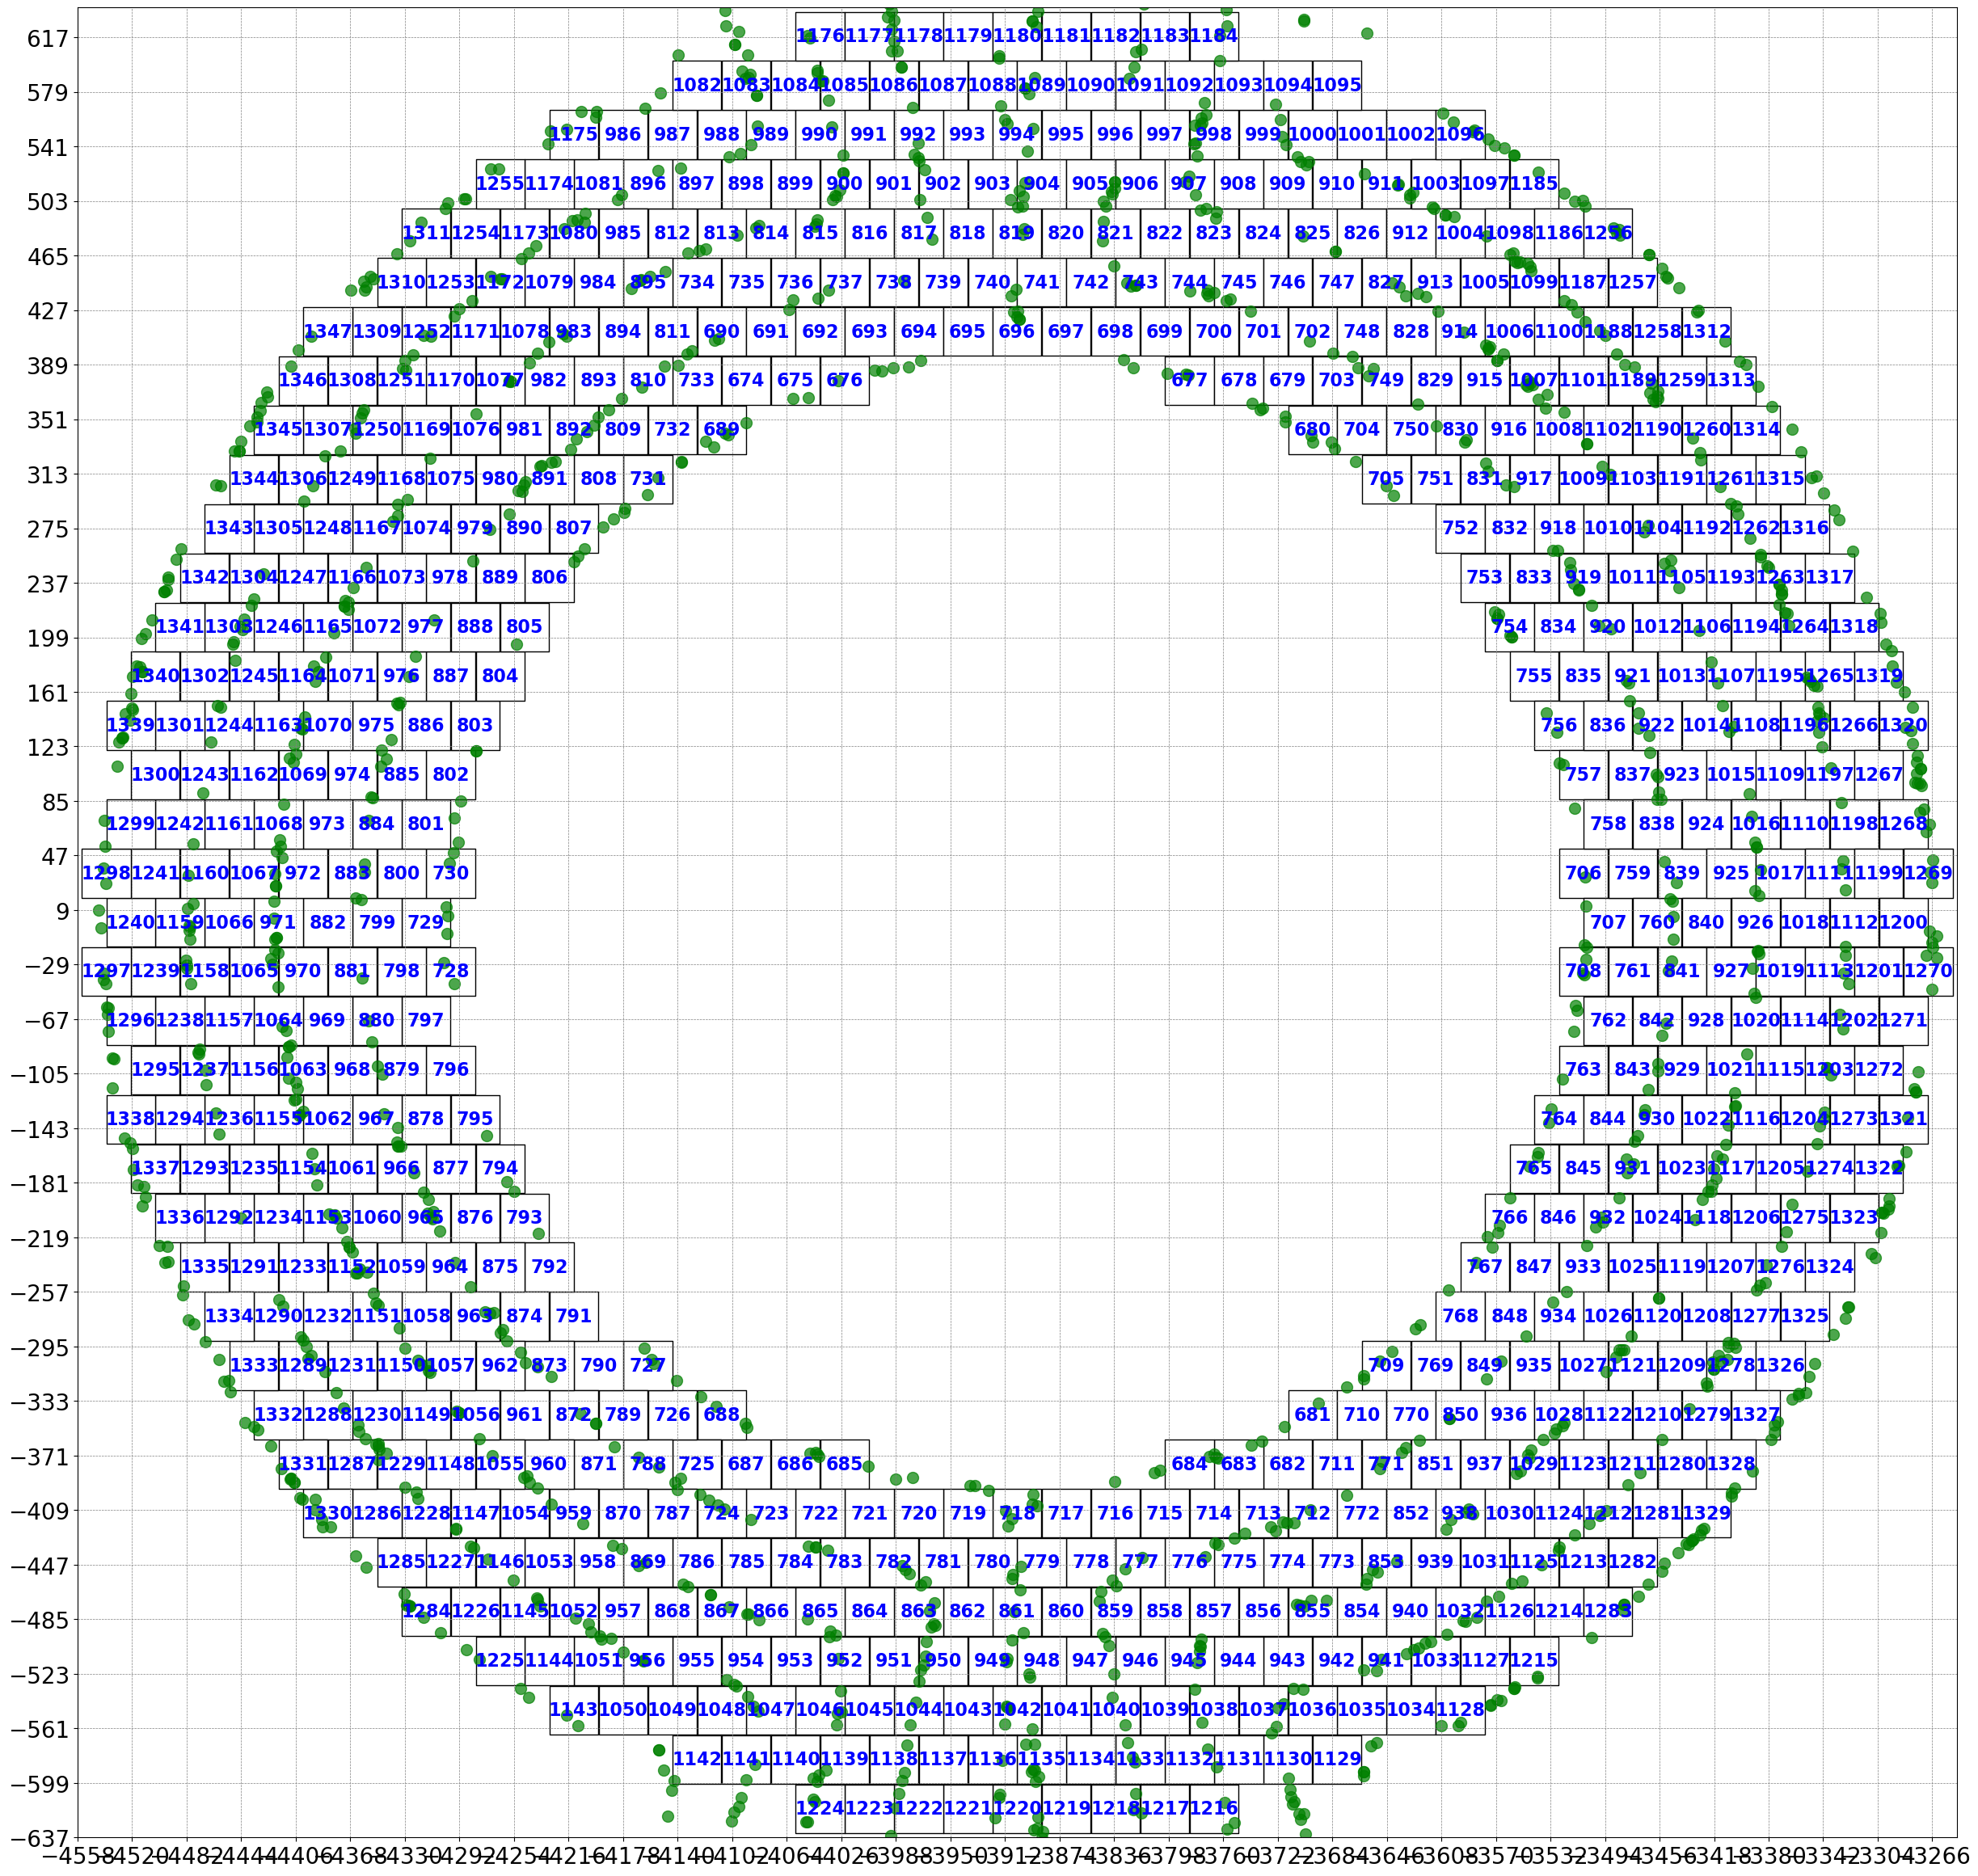

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Load cryPos data
cryPos = np.loadtxt("cryPos_wID.txt", delimiter=',')
cryPos = cryPos[673:]  # Use only rows from the 674th row onward

# Number of crystals
num_cry = len(cryPos)

# Create figure and axes
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

# Draw rectangles with colors
for i in range(num_cry):
    x_val = cryPos[i, 1]  # x-coordinate
    y_val = cryPos[i, 2]  # y-coordinate
    cry_id = int(cryPos[i, 0])  # Cry ID from the first column

    # Check if cry_id is in zero_chisq
    #if cry_id in zero_chisq:
    #    face_color = 'red'  # Color for zero_chisq crystals
    #elif cry_id in neg_chisq:
    #        face_color = 'yellow'  # Color for zero_chisq crystals
    #else:
    #    face_color = 'white'  # Default color

    # Draw the rectangle
    ax.fill_between(
        [x_val - 17, x_val + 17],
        y_val - 17, y_val + 17,
        color=face_color,
        edgecolor='black'
    )

    # Add text for cry_id
    ax.text(x_val, y_val, str(cry_id), va='center', ha='center', fontsize=16, color='blue',fontweight='bold')
# Scatter overlay with pipePosition data
pipe_x = pipePos[:, 1]  # x-coordinates from pipePosition
pipe_y = pipePos[:, 2]  # y-coordinates from pipePosition

# Scatter plot for pipe positions
ax.scatter(pipe_x, pipe_y, color='green', s=100, label="Pipe Positions", alpha=0.7)

# Set limits, grid, and ticks
min_x, max_x = np.min(cryPos[:, 1]) - 20, np.max(cryPos[:, 1]) + 20
min_y, max_y = np.min(cryPos[:, 2]) - 20, np.max(cryPos[:, 2]) + 20
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_xticks(np.arange(min_x, max_x, 38))
ax.set_yticks(np.arange(min_y, max_y, 38))
ax.grid(color='gray', linestyle='--', linewidth=0.5)
# Adjust axis number font sizes
ax.tick_params(axis='both', which='major', labelsize=20)  # Major ticks
ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks (optional)
# Display the plot
plt.savefig("Problem_crys.png",dpi=150, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()


##### making crystal map to indicate which crystals have zero peak

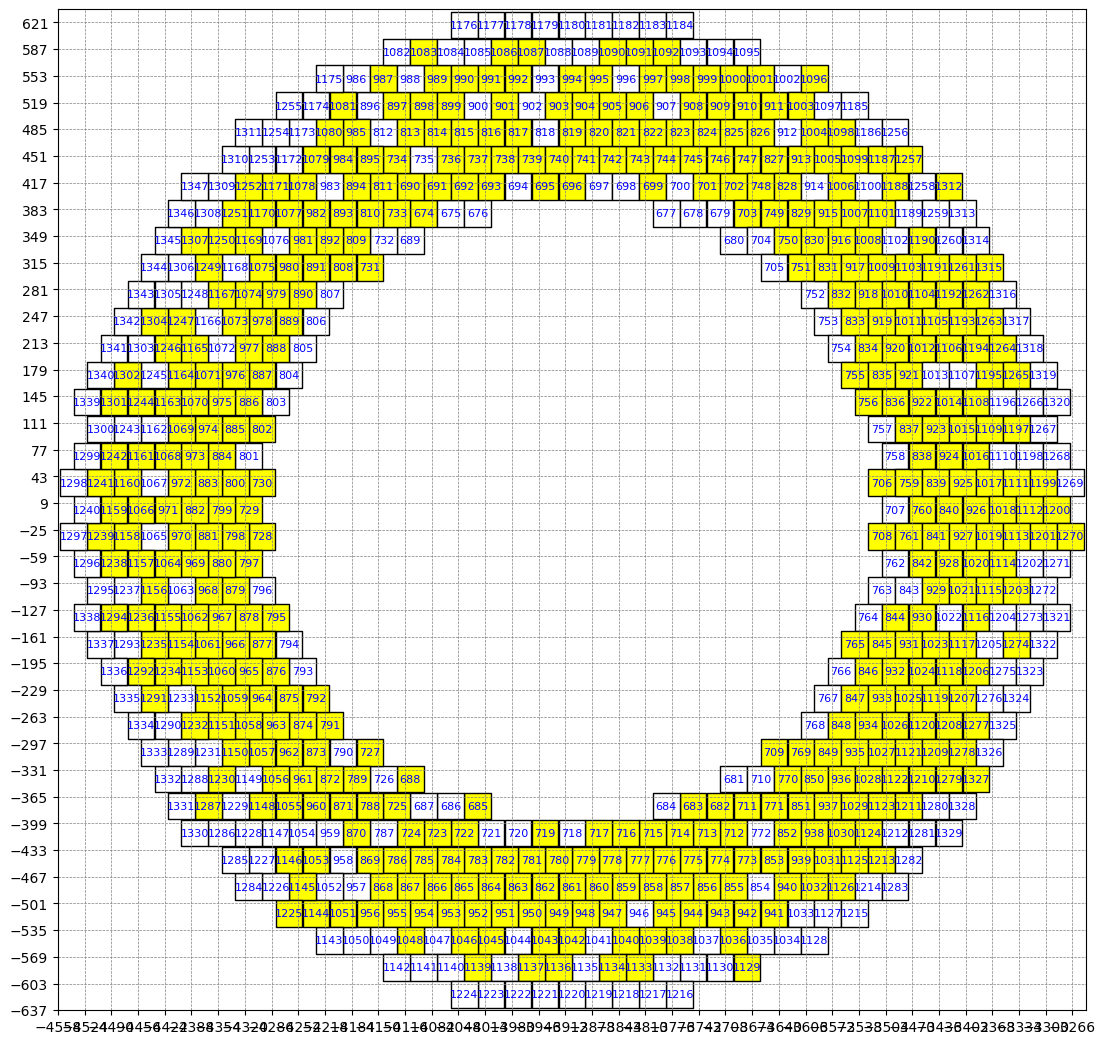

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Load cryPos data
cryPos = np.loadtxt("cryPos_wID.txt", delimiter=',')
cryPos = cryPos[673:]  # Use only rows from the 674th row onward

# Number of crystals
num_cry = len(cryPos)

# Create figure and axes
fig = plt.figure(figsize=(21, 13))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

# Draw rectangles with colors
for i in range(num_cry):
    x_val = cryPos[i, 1]  # x-coordinate
    y_val = cryPos[i, 2]  # y-coordinate
    cry_id = int(cryPos[i, 0])  # Cry ID from the first column

    # Check if cry_id is in zero_chisq
    if cry_id in zero_error:
        face_color = 'red'  # Color for zero_chisq crystals
    #elif cry_id in zero_error_nll:
            #face_color = 'yellow'  # Color for zero_chisq crystals
    else:
        face_color = 'white'  # Default color

    # Draw the rectangle
    ax.fill_between(
        [x_val - 17, x_val + 17],
        y_val - 17, y_val + 17,
        color=face_color,
        edgecolor='black'
    )

    # Add text for cry_id
    ax.text(x_val, y_val, str(cry_id), va='center', ha='center', fontsize=8, color='blue')

# Set limits, grid, and ticks
min_x, max_x = np.min(cryPos[:, 1]) - 20, np.max(cryPos[:, 1]) + 20
min_y, max_y = np.min(cryPos[:, 2]) - 20, np.max(cryPos[:, 2]) + 20
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_xticks(np.arange(min_x, max_x, 34))
ax.set_yticks(np.arange(min_y, max_y, 34))
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.savefig("Problem_crys.png",dpi=150, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()


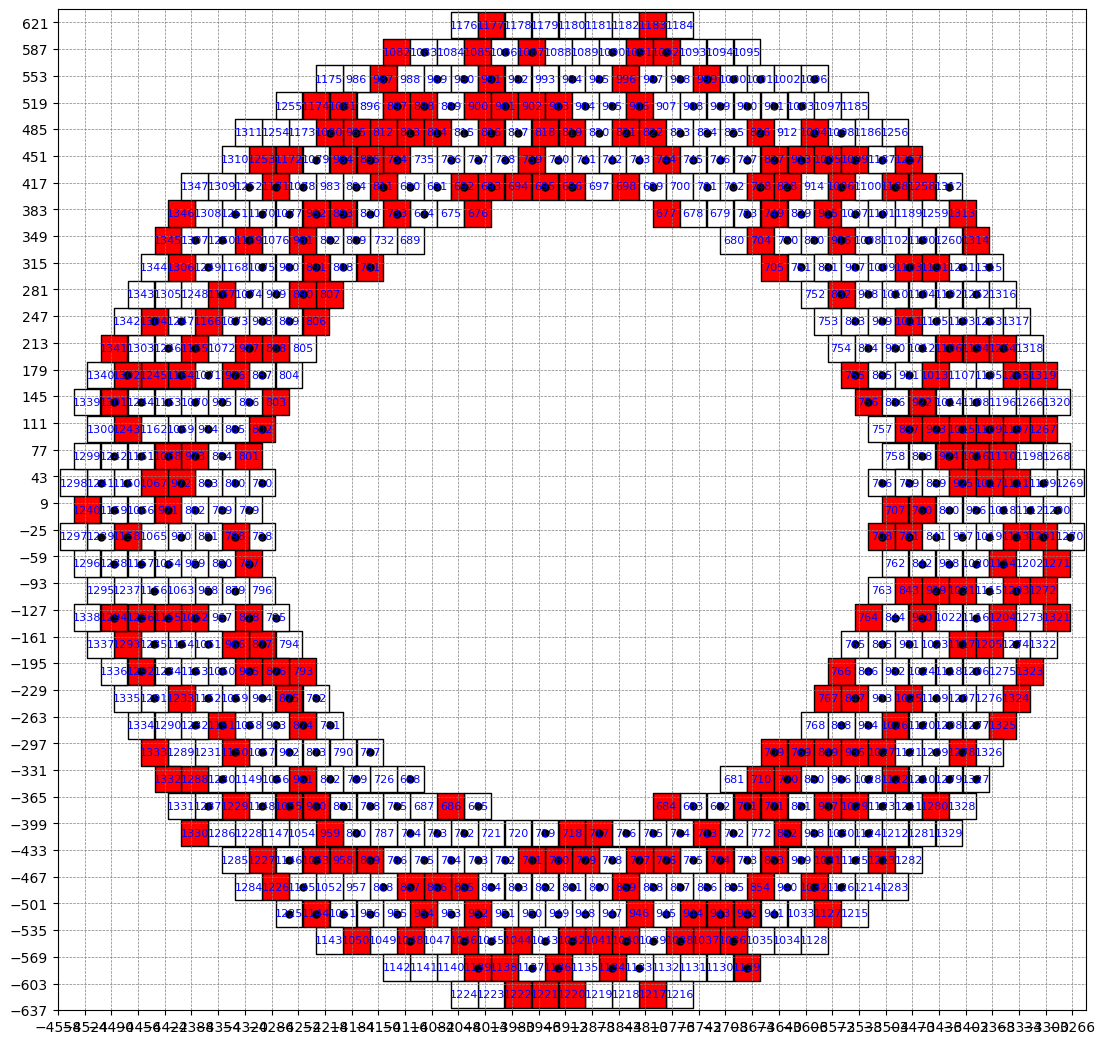

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Load cryPos data
cryPos = np.loadtxt("cryPos_wID.txt", delimiter=',')
cryPos = cryPos[673:]  # Use only rows from the 674th row onward

# Number of crystals
num_cry = len(cryPos)

# Create figure and axes
fig = plt.figure(figsize=(21, 13))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

# Draw rectangles with colors
for i in range(num_cry):
    x_val = cryPos[i, 1]  # x-coordinate
    y_val = cryPos[i, 2]  # y-coordinate
    cry_id = int(cryPos[i, 0])  # Cry ID from the first column

    # Determine face color based on zero_error
    if cry_id in zero_error:
        face_color = 'red'  # Color for zero_error crystals
    else:
        face_color = 'white'  # Default color

    # Draw the rectangle
    ax.fill_between(
        [x_val - 17, x_val + 17],
        y_val - 17, y_val + 17,
        color=face_color,
        edgecolor='black'
    )

    # Overlay dot if cry_id is in zero_error_nll
    if cry_id in zero_error_nll:
        ax.plot(x_val, y_val, 'ko', markersize=5)  # Black dot at the center

    # Add text for cry_id
    ax.text(x_val, y_val, str(cry_id), va='center', ha='center', fontsize=8, color='blue')

# Set limits, grid, and ticks
min_x, max_x = np.min(cryPos[:, 1]) - 20, np.max(cryPos[:, 1]) + 20
min_y, max_y = np.min(cryPos[:, 2]) - 20, np.max(cryPos[:, 2]) + 20
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_xticks(np.arange(min_x, max_x, 34))
ax.set_yticks(np.arange(min_y, max_y, 34))
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.savefig("Problem_crys.png", dpi=150, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()


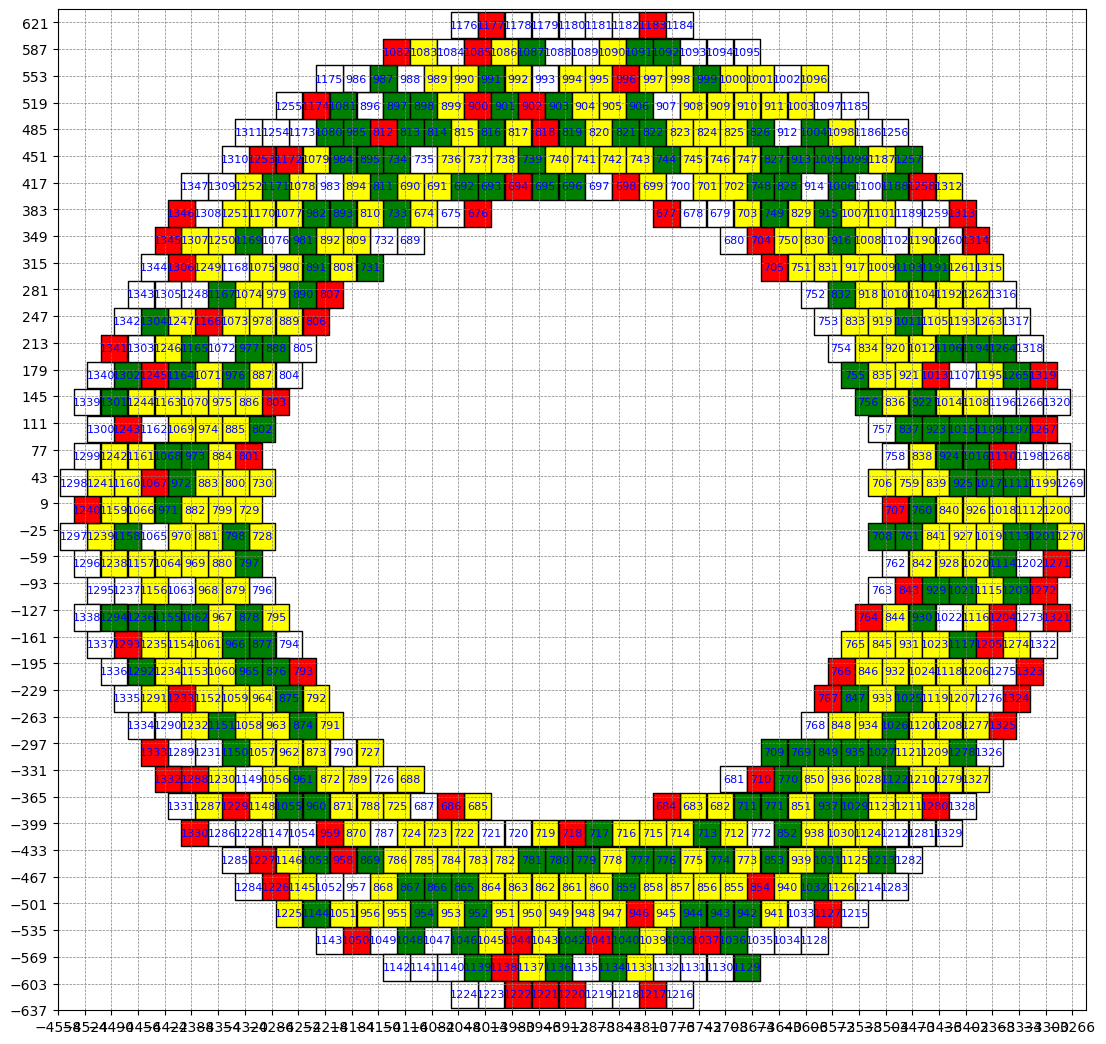

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load cryPos data
cryPos = np.loadtxt("cryPos_wID.txt", delimiter=',')
cryPos = cryPos[673:]  # Use only rows from the 674th row onward

# Number of crystals
num_cry = len(cryPos)

# Create figure and axes
fig = plt.figure(figsize=(21, 13))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

# Draw rectangles with colors
for i in range(num_cry):
    x_val = cryPos[i, 1]  # x-coordinate
    y_val = cryPos[i, 2]  # y-coordinate
    cry_id = int(cryPos[i, 0])  # Cry ID from the first column

    # Determine face color based on dataset membership
    if cry_id in zero_error and cry_id in zero_error_nll:
        face_color = 'green'  # Overlapping crystals are green
    elif cry_id in zero_error:
        face_color = 'red'  # Crystals in zero_error only
    elif cry_id in zero_error_nll:
        face_color = 'yellow'  # Crystals in zero_error_nll only
    else:
        face_color = 'white'  # Default color

    # Draw the rectangle
    ax.fill_between(
        [x_val - 17, x_val + 17],
        y_val - 17, y_val + 17,
        color=face_color,
        edgecolor='black'
    )

    # Add text for cry_id
    ax.text(x_val, y_val, str(cry_id), va='center', ha='center', fontsize=8, color='blue')

# Set limits, grid, and ticks
min_x, max_x = np.min(cryPos[:, 1]) - 20, np.max(cryPos[:, 1]) + 20
min_y, max_y = np.min(cryPos[:, 2]) - 20, np.max(cryPos[:, 2]) + 20
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_xticks(np.arange(min_x, max_x, 34))
ax.set_yticks(np.arange(min_y, max_y, 34))
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.savefig("Problem_crys.png", dpi=150, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()
